In [1]:
IS_RUNNING_GOOGLE_DRIVE = True  # @param {type:"boolean"}

In [2]:
if IS_RUNNING_GOOGLE_DRIVE:
    from google.colab import drive

    drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [4]:
if IS_RUNNING_GOOGLE_DRIVE:
    reviews_df = pd.read_csv(
        "/content/drive/MyDrive/UFMT/Gestão e Ciência de Dados/Disciplinas/14 - Seminário e Metodologia da Pesquisa/Projetos/glassdoor-reviews-report/glassdoor_reviews_predicted.csv"
    )
else:
    reviews_df = pd.read_csv("./glassdoor_reviews_predicted.csv")

In [5]:
reviews_df.head()

,review_id,company,employee_role,employee_detail,review_text,review_date,star_rating,sentiment,annotated,predicted_sentiment,sentiment_label
0,82630669,Tecnomapas,Recepcionista,"Ex-funcionário(a), mais de um ano","Companheirismo entre os colegas, oportunidade ...",2023-12-15,5.0,1,0,1,Positivo
1,82630669,Tecnomapas,Recepcionista,"Ex-funcionário(a), mais de um ano",Não tive nenhum ponto negativo,2023-12-15,5.0,0,1,0,Neutro
2,74420027,Tecnomapas,Analista Desenvolvedor,Ex-freelancer,Equipe bem prestativa e ótima de se trabalhar.,2023-03-11,4.0,1,0,1,Positivo
3,74420027,Tecnomapas,Analista Desenvolvedor,Ex-freelancer,Modo home office ainda tem que ser melhorado.,2023-03-11,4.0,2,0,2,Negativo
4,60212043,Tecnomapas,Funcionário confidencial,"Ex-funcionário(a), menos de um ano",Única vantagem era o trabalho ser home office,2022-02-24,1.0,0,1,0,Neutro


In [6]:
reviews_df["sentiment"] = reviews_df["sentiment"].apply(lambda x: 2 if x == -1 else x)

In [7]:
# reviews_df[reviews_df["sentiment"] != reviews_df["predicted_sentiment"]]

### Neutral predictions

In [8]:
true_0_predicted_0 = len(
    reviews_df[
        (reviews_df["sentiment"] == 0) & (reviews_df["predicted_sentiment"] == 0)
    ]
)
true_0_predicted_0

216

In [9]:
true_0_predicted_1 = len(
    reviews_df[
        (reviews_df["sentiment"] == 0) & (reviews_df["predicted_sentiment"] == 1)
    ]
)
true_0_predicted_1

9

In [10]:
true_0_predicted_2 = len(
    reviews_df[
        (reviews_df["sentiment"] == 0) & (reviews_df["predicted_sentiment"] == 2)
    ]
)
true_0_predicted_2

17

### Positive predictions

In [11]:
true_1_predicted_1 = len(
    reviews_df[
        (reviews_df["sentiment"] == 1) & (reviews_df["predicted_sentiment"] == 1)
    ]
)
true_1_predicted_1

1246

In [12]:
true_1_predicted_0 = len(
    reviews_df[
        (reviews_df["sentiment"] == 1) & (reviews_df["predicted_sentiment"] == 0)
    ]
)
true_1_predicted_0

5

In [13]:
true_1_predicted_2 = len(
    reviews_df[
        (reviews_df["sentiment"] == 1) & (reviews_df["predicted_sentiment"] == 2)
    ]
)
true_1_predicted_2

18

### Negative predictions

In [14]:
true_2_predicted_2 = len(
    reviews_df[
        (reviews_df["sentiment"] == 2) & (reviews_df["predicted_sentiment"] == 2)
    ]
)
true_2_predicted_2

1017

In [15]:
true_2_predicted_0 = len(
    reviews_df[
        (reviews_df["sentiment"] == 2) & (reviews_df["predicted_sentiment"] == 0)
    ]
)
true_2_predicted_0

2

In [16]:
true_2_predicted_1 = len(
    reviews_df[
        (reviews_df["sentiment"] == 2) & (reviews_df["predicted_sentiment"] == 1)
    ]
)
true_2_predicted_1

2

### Confusion matrix

In [17]:
# y_true = [0] * 242 + [1] * 1269 + [2] * 1021
# y_pred = [0] * 223 + [1] * 1257 + [2] * 1052

In [18]:
# y_true = reviews_df["sentiment"].to_numpy()
# y_pred = y_true = reviews_df["predicted_sentiment"].to_numpy()

In [19]:
# y_true[:10]

In [20]:
# y_pred[:10]

In [21]:
# cm = confusion_matrix(y_true, y_pred)

In [22]:
cm = np.array(
    [
        [true_0_predicted_0, true_0_predicted_1, true_0_predicted_2],
        [true_1_predicted_0, true_1_predicted_1, true_1_predicted_2],
        [true_2_predicted_0, true_2_predicted_1, true_2_predicted_2],
    ]
)

In [23]:
cm

array([[ 216,    9,   17],
       [   5, 1246,   18],
       [   2,    2, 1017]])

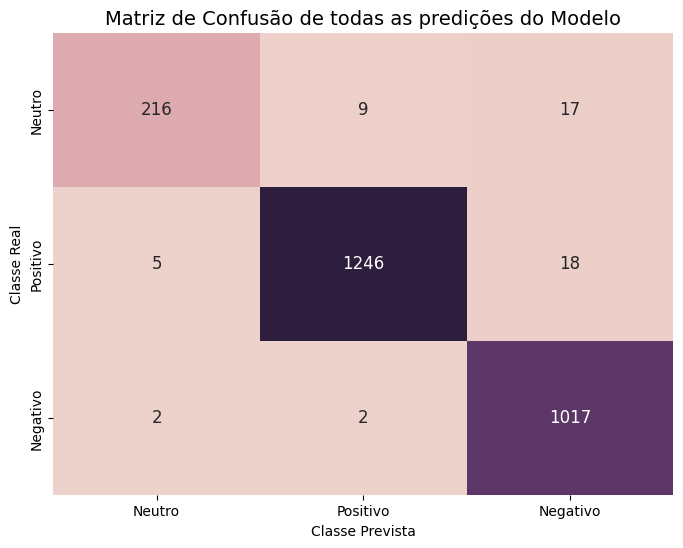

In [24]:
fig, ax = plt.subplots(1, figsize=(8, 6))
sns.heatmap(
    data=cm,
    annot=True,
    fmt="d",
    annot_kws={
        "fontsize": 12,
    },
    cbar=False,
    cmap=sns.cubehelix_palette(as_cmap=True),  # "Blues",
    xticklabels=["Neutro", "Positivo", "Negativo"],
    yticklabels=["Neutro", "Positivo", "Negativo"],
    ax=ax,
)

ax.set_ylabel("Classe Real")
ax.set_xlabel("Classe Prevista")
ax.set_title(
    "Matriz de Confusão de todas as predições do Modelo",
    loc="center",
    fontsize=14,
)

plt.savefig(
    "confusion_matrix.png",
    transparent=False,
    dpi=300,
    # bbox_inches="tight",
)

plt.show()

### Model evaluation

In [25]:
def calculate_precision(TP, FP):
    if (TP + FP) > 0:
        return TP / (TP + FP)

    return 0.0

In [26]:
def calculate_recall(TP, FN):
    if (TP + FN) > 0:
        return TP / (TP + FN)

    return 0.0

In [27]:
def calculate_f1_score(precision, recall):
    if (precision + recall) > 0:
        return 2 * (precision * recall) / (precision + recall)

    return 0.0

In [28]:
def calculate_accuracy(total_correct, total_predictions):
    if total_predictions > 0:
        return total_correct / total_predictions

    return 0.0

In [29]:
cm.shape[0]

3

In [30]:
def calculate_metrics(cm):
    total_predictions = np.sum(cm)

    for i in range(cm.shape[0]):
        total_correct = 0

        print(f"{'-'*10} Class: {i} {'-'*10}")

        TP = cm[i, i]  # True Positives
        print(f"TP: {TP}")

        FP = np.sum(cm[:, i]) - TP  # False Positives
        print(f"FP: {FP}")

        FN = np.sum(cm[i, :]) - TP  # False Negatives
        print(f"FN: {FN}")

        TN = np.sum(cm) - (TP + FP + FN)  # True Negatives

        print(f"TN: {TN}")

        total_correct += TP + TN

        precision = calculate_precision(TP, FP)
        recall = calculate_recall(TP, FN)
        f1_score = calculate_f1_score(precision, recall)
        accuracy = calculate_accuracy(total_correct, total_predictions)

        print(
            f"Precision = {precision:.2f}, Recall = {recall:.2f}, Accuracy: {accuracy:.2f}, F1 Score = {f1_score:.2f}\n"
        )

In [31]:
calculate_metrics(cm)

---------- Class: 0 ----------
TP: 216
FP: 7
FN: 26
TN: 2283
Precision = 0.97, Recall = 0.89, Accuracy: 0.99, F1 Score = 0.93

---------- Class: 1 ----------
TP: 1246
FP: 11
FN: 23
TN: 1252
Precision = 0.99, Recall = 0.98, Accuracy: 0.99, F1 Score = 0.99

---------- Class: 2 ----------
TP: 1017
FP: 35
FN: 4
TN: 1476
Precision = 0.97, Recall = 1.00, Accuracy: 0.98, F1 Score = 0.98

